In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
movies = pd.read_csv('/home/sushil/Documents/Assingment/AR-9/my_movies.csv')

In [180]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [181]:
from mlxtend.frequent_patterns import association_rules, apriori

In [182]:
items1 = apriori(movies.iloc[:, 5:], min_support = 0.005, max_len = 3, use_colnames = True)

In [183]:
items1.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


<AxesSubplot:xlabel='support'>

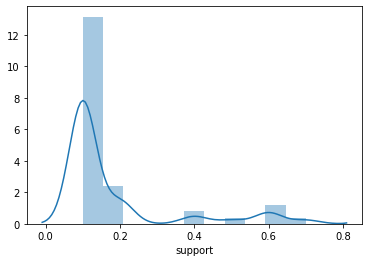

In [184]:
sns.distplot(items1.support)

<AxesSubplot:xlabel='support', ylabel='count'>

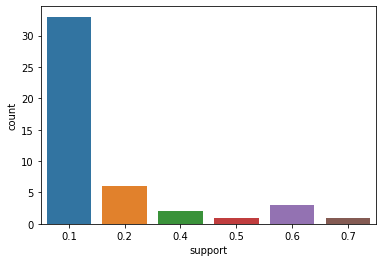

In [185]:
sns.countplot(items1.support)

In [186]:
items1.sort_values('support', ascending = False, inplace = True)

In [188]:
items1.head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
17,0.6,"(Patriot, Gladiator)"
4,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [189]:
items1.tail()

,support,itemsets
21,0.1,"(Harry Potter1, LOTR1)"
24,0.1,"(LOTR2, Harry Potter1)"
25,0.1,"(Harry Potter1, Harry Potter2)"
26,0.1,"(Harry Potter1, Green Mile)"
45,0.1,"(LOTR2, Harry Potter1, Green Mile)"


In [190]:
rules1 = association_rules(items1, metric = 'lift', min_threshold = 1)

In [191]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [192]:
rules1.sort_values('lift', inplace = True)

In [193]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
29,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


<AxesSubplot:xlabel='lift'>

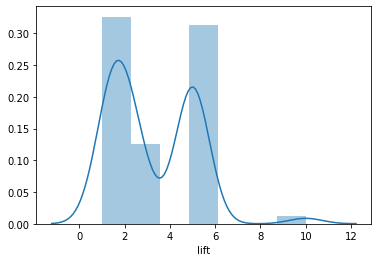

In [194]:
sns.distplot(rules1.lift)

<AxesSubplot:xlabel='lift', ylabel='count'>

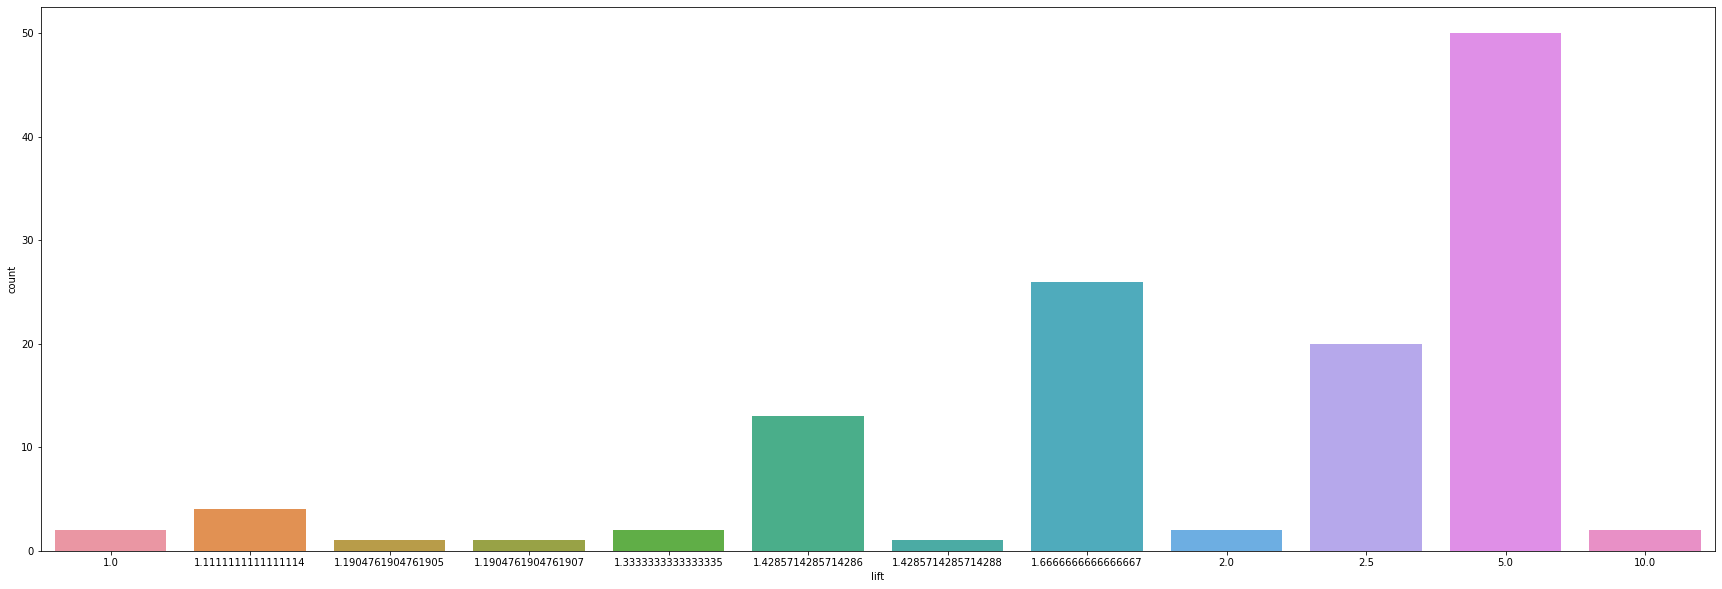

In [195]:
plt.figure(figsize = (30,10))
sns.countplot(rules1.lift)

In [196]:
items2 = apriori(movies.iloc[:, 5:], max_len = 3, min_support = 0.1, use_colnames = True)

In [197]:
items2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [198]:
items2.sort_values('support', ascending = False, inplace = True)

In [199]:
items2.head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
17,0.6,"(Patriot, Gladiator)"
4,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


<AxesSubplot:xlabel='support', ylabel='count'>

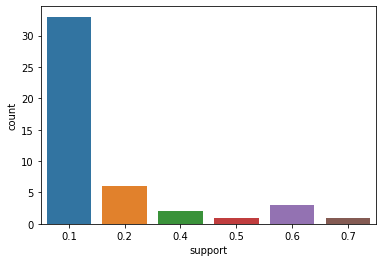

In [200]:
sns.countplot(items2.support)

In [201]:
rules2 = association_rules(items2, metric = 'lift', min_threshold = 1.42)

In [202]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
3,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [203]:
rules2.sort_values('lift', ascending = False, inplace = True)

In [204]:
rules2.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,"(LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
18,(Gladiator),"(LOTR, Sixth Sense)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
74,(Gladiator),"(LOTR, Green Mile)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
15,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


<AxesSubplot:xlabel='lift', ylabel='count'>

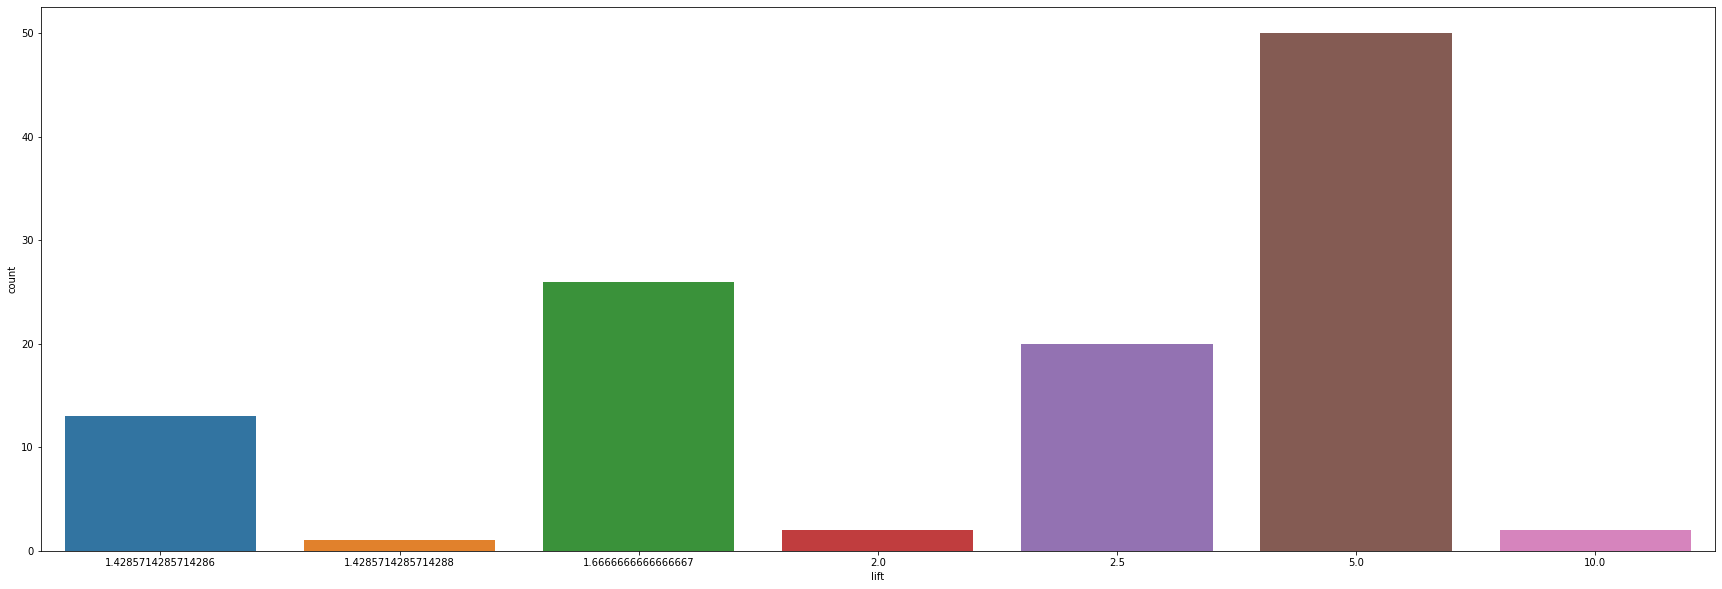

In [205]:
plt.figure(figsize = (30, 10))
sns.countplot(rules2.lift)

In [206]:
rules3 = association_rules(items2, metric = 'lift', min_threshold  = 2.5)

In [207]:
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
1,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
2,"(LOTR2, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
3,"(Harry Potter1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
4,(LOTR2),"(Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [208]:
rules3.sort_values('lift', ascending = False, inplace = True)

In [209]:
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
42,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
0,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
30,"(Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
33,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [210]:
rules3.count()

antecedents           72
consequents           72
antecedent support    72
consequent support    72
support               72
confidence            72
lift                  72
leverage              72
conviction            72
dtype: int64

<AxesSubplot:xlabel='lift', ylabel='count'>

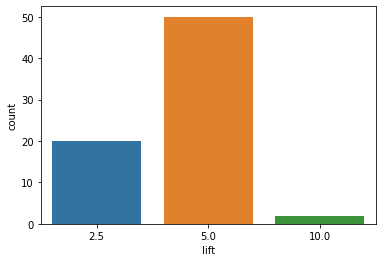

In [211]:
sns.countplot(rules3.lift)